# 1. Importing Libraries

In [46]:

# Import the packages we will use in this project 
!pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data 
df = pd.read_csv(r'C:\Users\R\Downloads\movies.csv')


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Let's look at the data 
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

# 3. Missing Data 

In [4]:
# Missing Data Percentage
for col in df.columns:
    percent_missing = np.mean(df[col].isnull()) * 100
    print(f"{col} - {percent_missing:.2f}%")

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


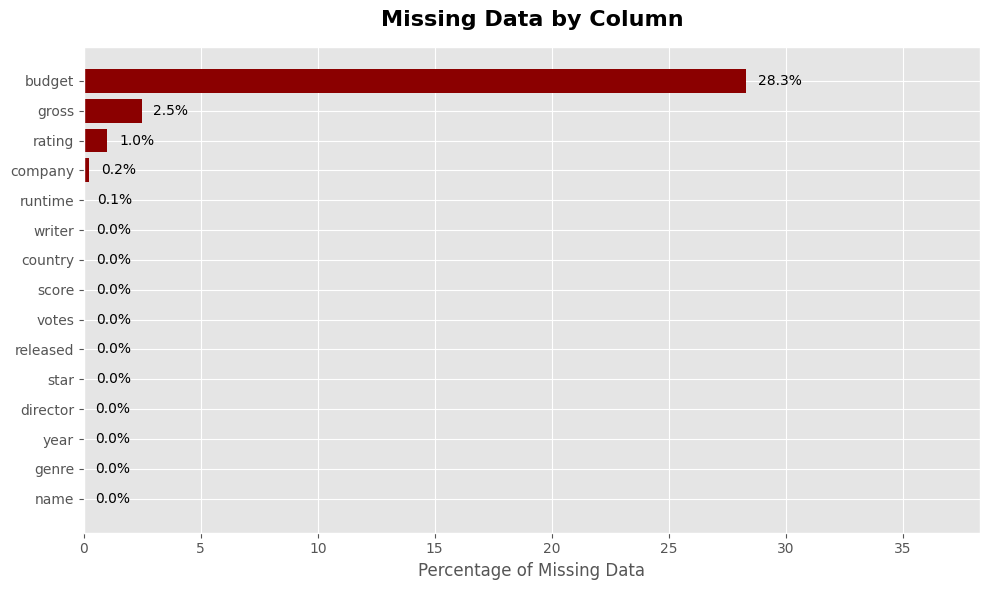

In [5]:
# Calculate missing data percentage
percent_missing = df.isnull().mean() * 100
percent_missing = percent_missing.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6), dpi=100)
plt.barh(percent_missing.index, percent_missing.values, color='darkred')

# Add percentage labels
for i, v in enumerate(percent_missing.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10)

plt.xlabel("Percentage of Missing Data", fontsize=12)
plt.title("Missing Data by Column", fontsize=16, fontweight='bold', pad=15)
plt.xlim(0, percent_missing.max() + 10)
plt.tight_layout()
plt.show()


In [6]:
# Only columns with missing data 
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Columns with missing data:")

for col, pct in missing_percent[missing_percent > 0].items():
    print(f"{col} - {pct:.2f}%")

Columns with missing data:
budget - 28.31%
gross - 2.46%
rating - 1.00%
company - 0.22%
runtime - 0.05%
score - 0.04%
votes - 0.04%
country - 0.04%
writer - 0.04%
released - 0.03%
star - 0.01%


In [7]:
# Data types for our columns 
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# 4. Data Cleaning 

In [18]:
# Removing all rows where the budget or gross column is missing
df.dropna(subset=['budget', 'gross'], inplace=True)

In [19]:
# Transforming 'budget' and 'gross' to int64 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [22]:
# All Data sorted by 'gross revenue' 

# Install itables (run only once)
!pip install itables

# Import and enable interactive mode
from itables import show, init_notebook_mode
init_notebook_mode(all_interactive=True)

# Sort DataFrame by 'gross' descending (without changing original df)
df_sorted = df.sort_values(by='gross', ascending=False)

# Display all data in one scrollable table
show(
    df_sorted,
    paging=False,     # no pagination, show all rows in scrollable box
    scrollY=600,      # vertical scroll box height in pixels
    scrollX=True      # enable horizontal scrolling for all columns
)


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
#  Check for duplicates 'company' column
if df['company'].duplicated().any():
    print("There are duplicates in the 'company' column.")
else:
    print(" No duplicates found. All companies are unique.")


There are duplicates in the 'company' column.


In [30]:
# Drop any duplicates across the df 

def check_data(df):
    """
    Check a DataFrame for duplicates and missing values.
    Displays both in scrollable tables in Jupyter Notebook.
    """
    # Check for duplicates
    duplicates = df[df.duplicated(keep=False)]
    if duplicates.empty:
        print("No duplicate rows found.")
    else:
        print(f"Duplicate rows found: {duplicates.shape[0]}")
        show(duplicates, paging=False, scrollY=400, scrollX=True, searchable=True)
    
    # Check for missing data
    missing_percent = df.isnull().mean() * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    
    if missing_percent.empty:
        print("No missing values found.")
    else:
        print("Columns with missing data (%):")
        show(missing_percent.to_frame("Percent Missing"), paging=False, scrollY=300, scrollX=True, searchable=True)

check_data(df)

No duplicate rows found.
Columns with missing data (%):


c:\Users\R\AppData\Local\Programs\Python\Python313\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'searchable'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\R\AppData\Local\Programs\Python\Python313\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'searchable'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


# 5. Film Budget vs Gross Revenue: Correlation?

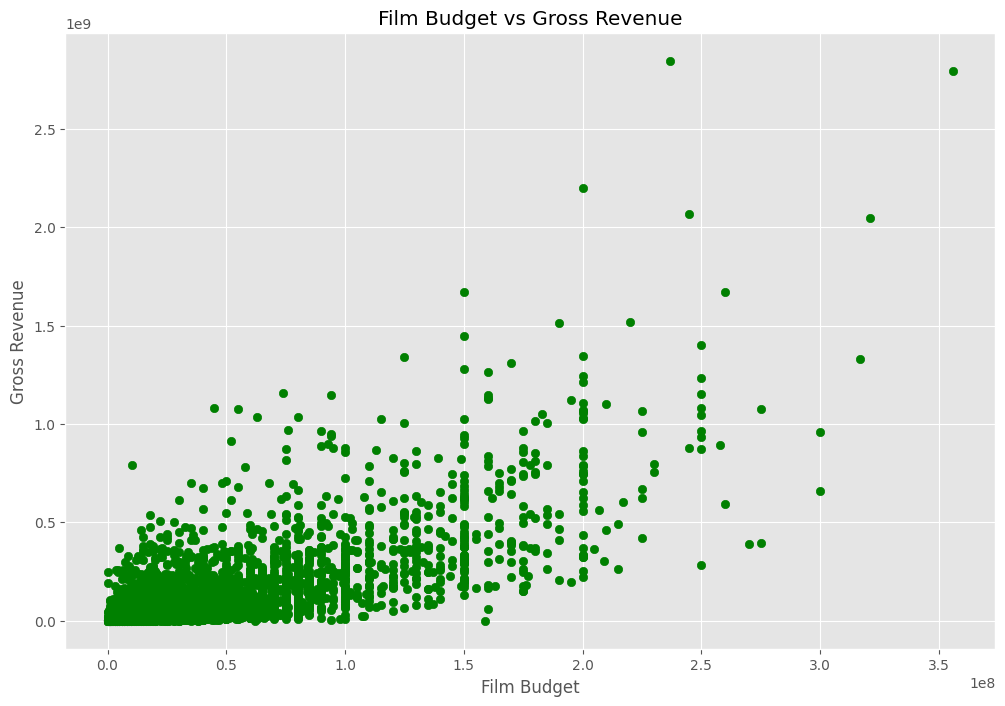

In [ ]:
# Scatter plot with Budget vs Gross 

plt.scatter(x=df['budget'], y=df['gross'], color='green')

plt.title('Film Budget vs Gross Revenue')

plt.xlabel('Film Budget')

plt.ylabel('Gross Revenue')

plt.show()

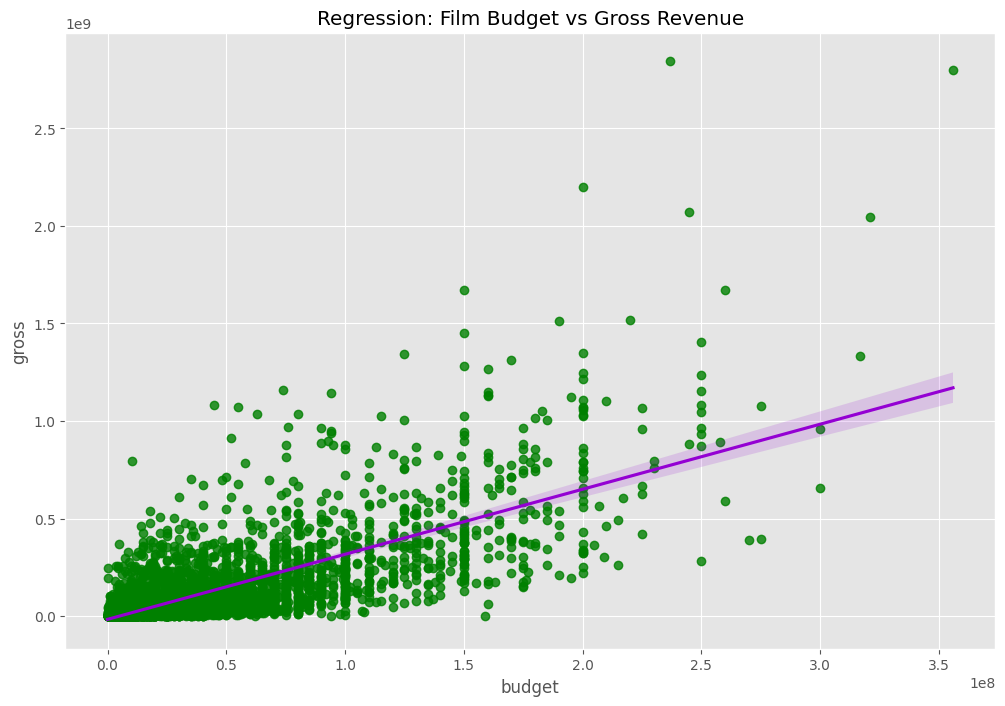

In [28]:
# Regression plot using Seaborn

sns.regplot(x='budget', y='gross', data=df,
            scatter_kws={"color": "green"}, line_kws={"color": "darkviolet"})
plt.title('Regression: Film Budget vs Gross Revenue')
plt.show()

# 6. Correlation Analysis

In [31]:
# Pearson Correlation 
df_pearson = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
df_pearson

#numeric_df = df.select_dtypes(include=[np.number])
#correlation_matrix = numeric_df.corr(method='pearson')
#print(correlation_matrix)

year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

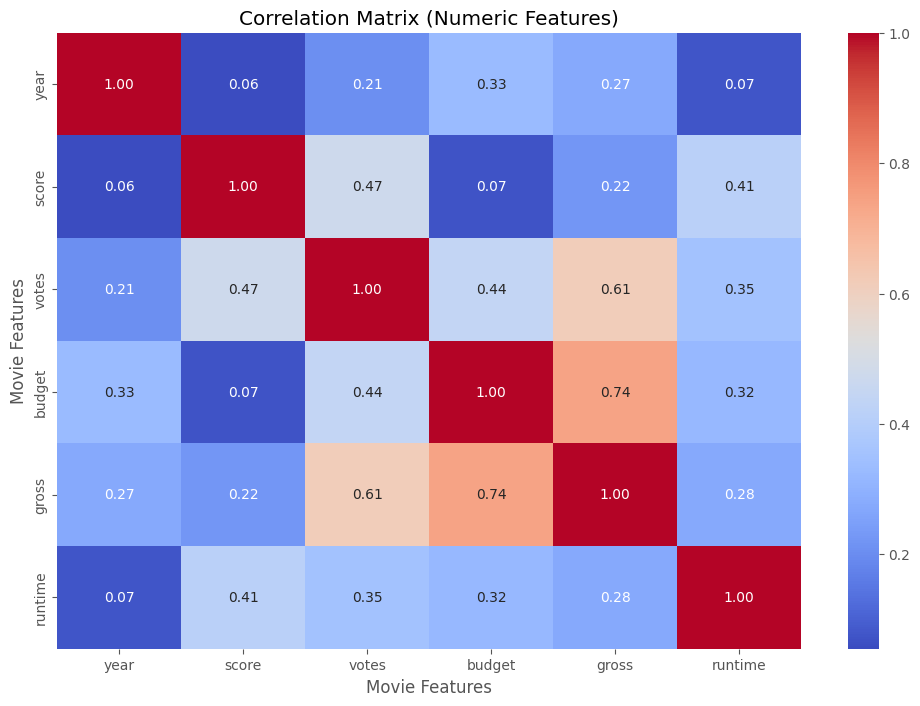

In [36]:
# Correlation Matrix Heatmap 
correlation_matrix = df_pearson.corr(method='pearson')

sns.heatmap(df_pearson, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlation Matrix (Numeric Features)")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

# 7. Numerized Categorial Data 

In [53]:
# Install itables (run only once)
!pip install itables

# Import and enable interactive mode
from itables import show, init_notebook_mode
init_notebook_mode(all_interactive=True)

# Display all data in one scrollable table
show(
    df_numerized,
    paging=False,     
    scrollY=600,      
    scrollX=True      
)

# Numerize 
df_numerized = df.copy()
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category').cat.codes



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 8. Data Frame Correlation Matrix 

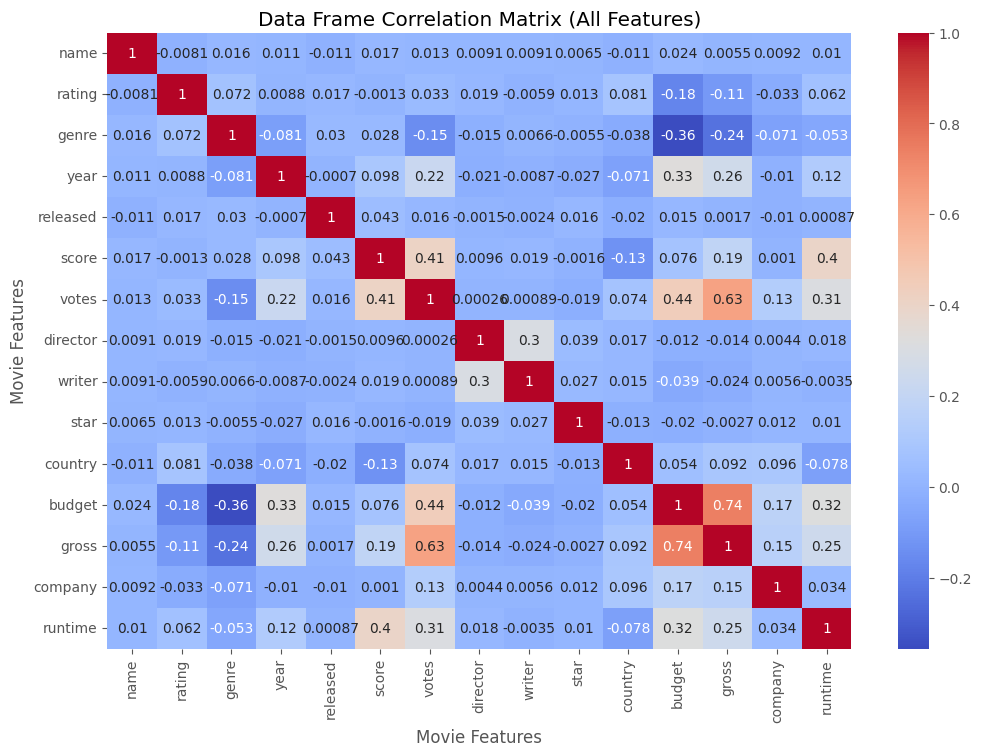

In [57]:
# Data Frame Correlation Matrix Heatmap 
df_correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(df_correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Data Frame Correlation Matrix (All Features)")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

# 9. Ordering by Features/Correlation

In [ ]:
# Install itables (run only once)
!pip install itables

# Import and enable interactive mode
from itables import show, init_notebook_mode
init_notebook_mode(all_interactive=True)

# Display all data in one scrollable table
show(
    corr_pairs,
    paging=False,     
    scrollY=600,      
    scrollX=True      
)

df_correlation_matrix = df_numerized.corr(method='pearson')

corr_pairs = df_correlation_matrix.unstack()


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
sorted_pairs = corr_pairs.sort_values()

# Install itables (run only once)
!pip install itables

# Import and enable interactive mode
from itables import show, init_notebook_mode
init_notebook_mode(all_interactive=True)

# Display all data in one scrollable table
show(
    sorted_pairs,
    paging=False,     
    scrollY=600,      
    scrollX=True      
)


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 10. Strongly Correlated (>0,5 & Without Autocorrelations)

In [ ]:
high_corr = sorted_pairs[((sorted_pairs) > 0.5) & (abs(sorted_pairs) < 1)]
high_corr = high_corr.sort_values(ascending=False)

print("Strongly correlated feature pairs (|corr| > 0.5):\n")
print(high_corr)

Strongly correlated feature pairs (|corr| > 0.5):

gross   budget    0.740395
budget  gross     0.740395
gross   votes     0.630757
votes   gross     0.630757
dtype: float64


# 11. Conclusions 
1. The film budget is highly correlated to the gross revenue. 

2. Votes are highly correlated to the gross revenue as well. 